In [1]:
# Student Information:
# Name Muhammad Owais Imran
# CWID: 20025554
# HW # 02
# HW Title: EDA
# Description: Explore EDA and its step on Breast Cancer Dataset

# **Library Import Section**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Homework 02: Exploratory Data Analysis**

## **Part01**

In [3]:
# loading data from csv file

df = pd.read_csv("MuhammadOwais_Imran_HW02_BreastCancerDataset.csv")
df

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### **Exercise01:** Summarising each column (Mix, Max, Mean)

In [4]:
filtered_df = df.drop(["Class", "Sample", "F6"], axis=1)
filtered_df.describe()

,F1,F2,F3,F4,F5,F7,F8,F9
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### **Exercise02:** Identity Missing Values

In [5]:
rows_with_missing_value = df[df.eq("?").any(axis=1)]
rows_with_missing_value

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


### **Exercise03:** Replace the missing value with the mean of the column

In [6]:
for col in df.columns.to_list():
    if col not in ["Sample", "Class"] and (df[col] == "?").any():
        # replacing the missing value with a NaN so that it does not get computed in mean, and then replace NaN with mean
        df[col] = df[col].replace("?", np.nan)
        df[col] = df[col].astype("float")
        col_mean = df[col].mean()
        df[col] = df[col].replace(np.nan, col_mean)

df.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### **Exercise04:** IV.	Displaying the frequency table of “Class” vs. F6

In [7]:
pd.crosstab(df["F6"], df["Class"])

Class,2,4
F6,,
1.000000,387,15
2.000000,21,9
3.000000,14,14
3.544656,14,2
4.000000,6,13
5.000000,10,20
6.000000,0,4
7.000000,1,7
8.000000,2,19


### **Exercise05:** Displaying the scatter plot of F1 to F6, one pair at a time

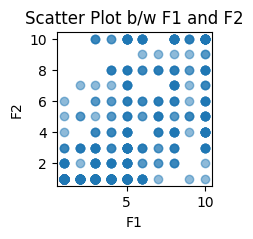

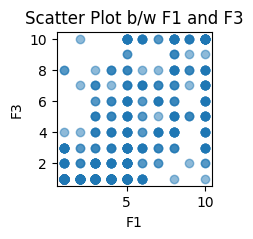

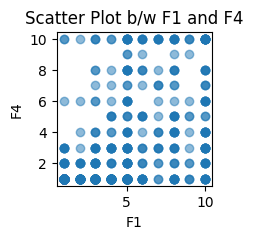

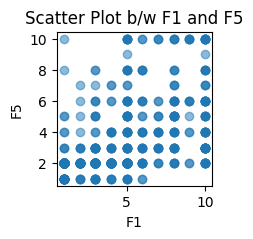

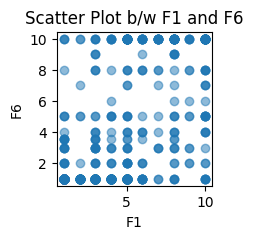

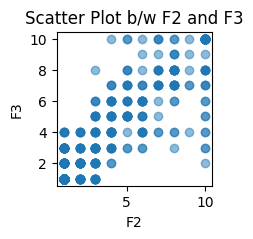

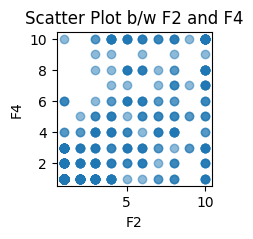

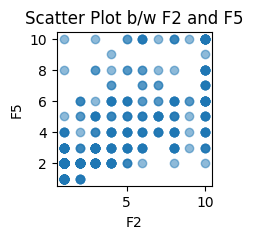

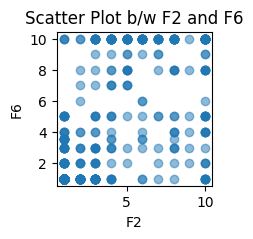

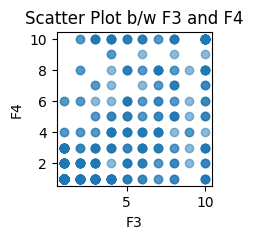

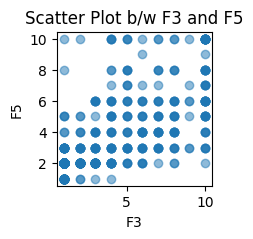

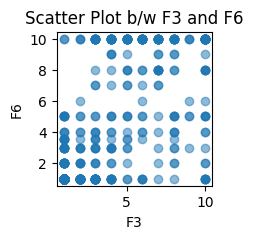

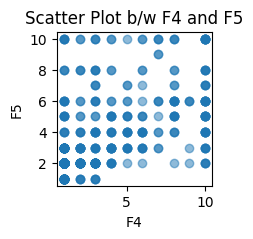

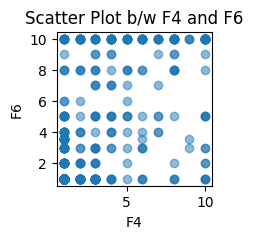

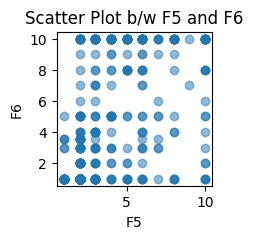

In [8]:
e05_cols = ["F1", "F2", "F3", "F4", "F5", "F6"]

for i in range(0, len(e05_cols)):
    for j in range(i+1, len(e05_cols)):
        if i != j:
            plt.figure(figsize=(2,2))
            plt.scatter(
                df[e05_cols[i]], df[e05_cols[j]], marker="o", alpha=0.5
            )
            plt.xlabel(f"{e05_cols[i]}")
            plt.ylabel(f"{e05_cols[j]}")
            plt.title(f"Scatter Plot b/w {e05_cols[i]} and {e05_cols[j]}")
            plt.show()

### **Exercise06:** Show histogram box plot for columns F7 to F9

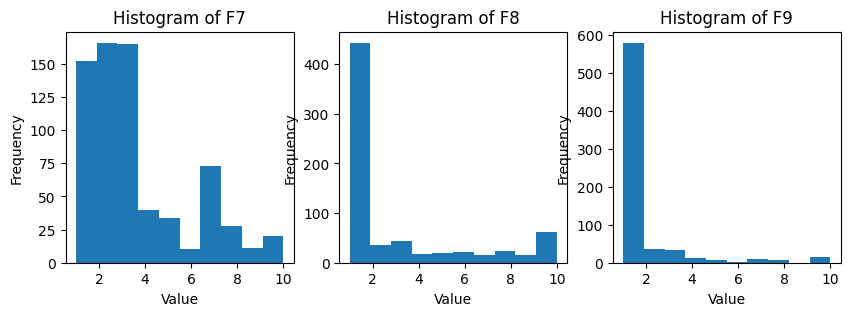

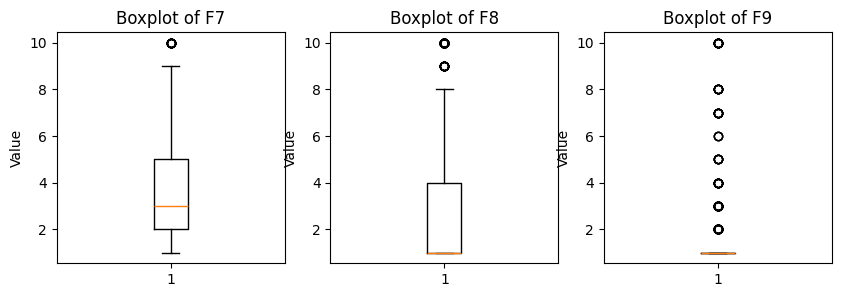

In [8]:
e06_cols = ["F7", "F8", "F9"]

plt.figure(figsize=(10, 3))
for i in range(1, len(e06_cols)+1):
    s = "13" + str(i)
    plt.subplot(int(s))
    plt.hist(df[e06_cols[i-1]], bins=10)
    plt.title(f"Histogram of {e06_cols[i-1]}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.figure(figsize=(10, 3))
for i in range(1, len(e06_cols)+1):
    s = "13" + str(i)
    plt.subplot(int(s))
    plt.boxplot(df[e06_cols[i-1]])
    plt.title(f"Boxplot of {e06_cols[i-1]}")
    plt.ylabel('Value')

## **Part02**

In [9]:
# loading data from csv file

df = pd.read_csv("MuhammadOwais_Imran_HW02_BreastCancerDataset.csv")

df.replace("?", np.nan, inplace=True)
print(df.size)
df.dropna(inplace=True)
print(df.size)



7689
7513
